### Linear programing

https://realpython.com/linear-programming-python/

In [1]:
pip install -U "pulp==2.1"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 6.6 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [28]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable
import numpy as np
import matplotlib.pyplot as plt



- maximize z = x + 2y
- subject to:   
-               2x + y <= 20
-             -4x + 5y <= 10
-              -x + 2y >= -2
-               -x + 5y = 15
-                     x> = 0
-                     y >= 0


In [58]:
# Create the model
model = LpProblem(name="small-problem", sense=LpMaximize)

# You use the sense parameter to choose whether to perform minimization (LpMinimize or 1, which is the default) or maximization (LpMaximize or -1). This choice will affect the result of your problem.

In [59]:
# Initialize the decision variables
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

In [60]:
# Add the constraints to the model
model += (2 * x + y <= 20, "blue_constraint")
model += (4 * x - 5 * y >= -10, "yellow_constraint")
model += (-x + 2 * y >= -2, "green_constraint")
model += (-x + 5 * y == 15, "red_constraint")

In [61]:
# Add the objective function to the model
model += x + 2 * y

In [62]:
# Solve the problem
status = model.solve()

In [63]:
model

small-problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
blue_constraint: 2 x + y <= 20

yellow_constraint: 4 x - 5 y >= -10

green_constraint: - x + 2 y >= -2

red_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

Text(0, 0.5, '$y$')

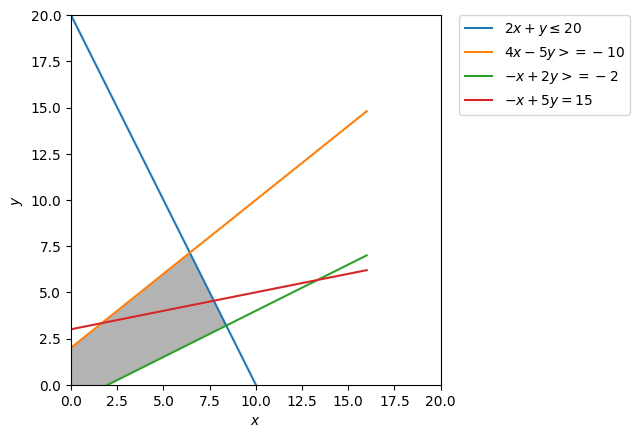

In [72]:
# plot the feasible region
d = np.linspace(-2,16,300)
x,y = np.meshgrid(d,d)
plt.imshow( ((2 * x + y <= 20) & (4 * x - 5 * y >= -10) & (-x + 2 * y >= -2) ).astype(int) , extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);

# plt.imshow( ( (2*y<=25-x) & (4*y>=2*x-8) & (y<=2*x-5)).astype(int) , 
#                 extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);



# plot the lines defining the constraints -> need to move x
x = np.linspace(0, 16, 2000)

# 2 x + y <= 20
y1 = (20 - 2*x)

# 4 * x - 5 * y >= -10
y2 = (10 + 4*x) / 5

# -x + 2 * y >= -2
y3 = (-2 + x)/2

# -x + 5 * y == 15
y4 = (15 + x) / 5



# Make plot
plt.plot(x, y1, label=r'$2 x + y \leq 20$')
plt.plot(x, y2, label=r'$4 x - 5 y >= -10$')
plt.plot(x, y3, label=r'$- x + 2 y >= -2$')
plt.plot(x, y4, label=r'$- x + 5 y = 15$')
plt.xlim(-0,20)
plt.ylim(-0,20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


In [12]:
print(f"status: {model.status}, {LpStatus[model.status]}")

status: 1, Optimal


In [13]:
print(f"objective: {model.objective.value()}")

objective: 16.8181817


In [14]:
for var in model.variables():
    print(f"{var.name}: {var.value()}")

x: 7.7272727
y: 4.5454545


In [11]:
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")

red_constraint: -9.99999993922529e-08
blue_constraint: 18.181818300000003
yellow_constraint: 3.3636362999999996
green_constraint: -2.0000000233721948e-07


In [87]:
model.variables()[0].value()

7.7272727

Text(0, 0.5, '$y$')

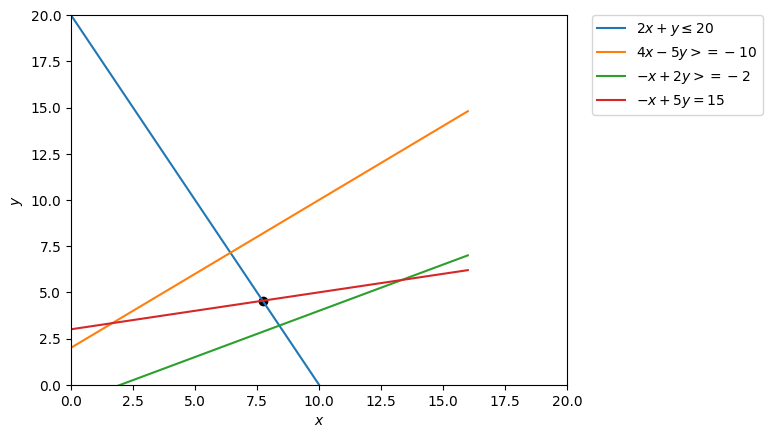

In [88]:

x_opt = model.variables()[0].value()
y_opt = model.variables()[1].value()
plt.plot(x, y1, label=r'$2 x + y \leq 20$')
plt.plot(x, y2, label=r'$4 x - 5 y >= -10$')
plt.plot(x, y3, label=r'$- x + 2 y >= -2$')
plt.plot(x, y4, label=r'$- x + 5 y = 15$')
plt.scatter(x_opt, y_opt, c='black')
plt.xlim(-0,20)
plt.ylim(-0,20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
